In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

''''
Training set: 60,000 images (X_train, y_train).

Testing set: 10,000 images (X_test, y_test).

'''

"'\nTraining set: 60,000 images (X_train, y_train).\n\nTesting set: 10,000 images (X_test, y_test).\n\n"

In [7]:
X_train[0].shape

(28, 28)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

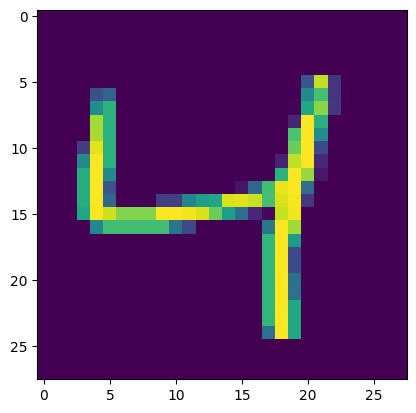

In [20]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [21]:
X_train = X_train/255
X_test = X_test/255

In [23]:
X_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [24]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

c:\Users\Jeevan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [27]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8559 - loss: 0.5040 - val_accuracy: 0.9578 - val_loss: 0.1430
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9627 - loss: 0.1269 - val_accuracy: 0.9681 - val_loss: 0.1107
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9760 - loss: 0.0805 - val_accuracy: 0.9692 - val_loss: 0.1012
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9802 - loss: 0.0636 - val_accuracy: 0.9711 - val_loss: 0.0948
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9858 - loss: 0.0464 - val_accuracy: 0.9703 - val_loss: 0.1049
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9882 - loss: 0.0359 - val_accuracy: 0.9750 - val_loss: 0.0894
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9913 - loss: 0.0284 - val_accuracy: 0.9701 - val_loss: 0.1125
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9921 - loss: 0.0232 - 

In [28]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [36]:
y_prob

array([[1.0056319e-21, 7.7211427e-19, 2.7944839e-18, ..., 1.0000000e+00,
        1.9599515e-16, 2.3558664e-12],
       [4.4258521e-27, 2.2742756e-18, 1.0000000e+00, ..., 3.8952863e-24,
        2.9865945e-18, 4.6176798e-37],
       [5.0889438e-17, 9.9999988e-01, 9.2213494e-11, ..., 2.8155130e-08,
        5.2915265e-08, 2.0391710e-15],
       ...,
       [1.4502014e-26, 8.6566198e-17, 7.8131264e-23, ..., 4.5728857e-17,
        1.2447731e-13, 5.7708383e-11],
       [5.1846715e-22, 2.8830821e-32, 3.7990114e-28, ..., 6.2406012e-25,
        6.7702928e-15, 8.3461840e-28],
       [1.6774395e-24, 2.0884541e-29, 1.1902164e-19, ..., 2.1672458e-29,
        2.7197999e-20, 2.1927333e-30]], dtype=float32)

In [30]:
y_prob.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [37]:
y_pred = y_prob.argmax(axis=1)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9751

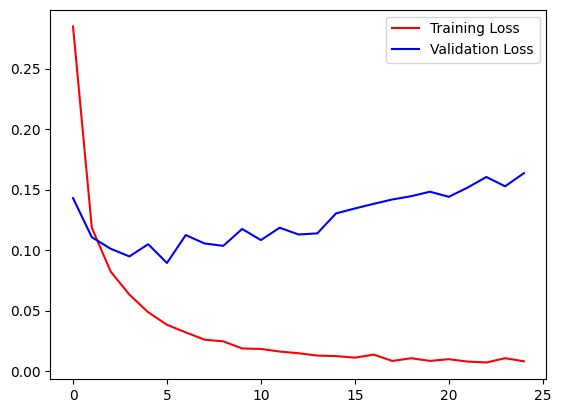

In [42]:
plt.plot(history.history['loss'], color='red', label='Training Loss')
plt.plot(history.history['val_loss'], color='blue', label='Validation Loss')
plt.legend() 

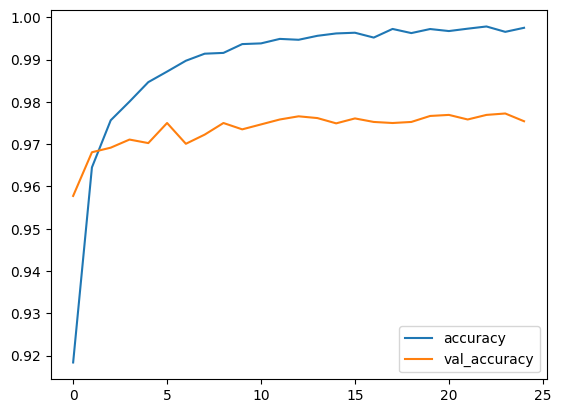

In [43]:
plt.plot(history.history['accuracy'], label= 'accuracy')
plt.plot(history.history['val_accuracy'], label= 'val_accuracy')
plt.legend()

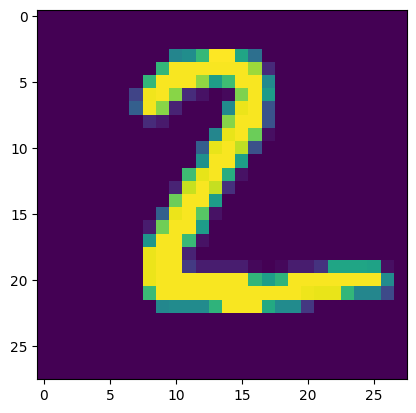

In [44]:
plt.imshow(X_test[1])

In [ ]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([2], dtype=int64)